<a href="https://colab.research.google.com/github/kjeyaram-orcl/DataScience/blob/main/LinearRegression_Ecom_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression Project - Ecommerce clothing store**

An Ecommerce company based in New York City that sells clothing online is at a fork in the road. Although, it is an online clothing store, they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.


The company is trying to decide whether to focus their efforts on their mobile app experience or their website. We'll explore the data and apply linear regression technique to provide the company with the insights to better their decision process

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the dataset**


In [2]:
cust_data = pd.read_csv('/content/Ecommerce Customers')

The csv has Customer info, such as Email, Address, and their color Avatar. It also has numerical value columns:

* **Avg. Session Length**: Average session of in-store style advice sessions.
* **Time on App**: Average time spent on App in minutes
* **Time on Website**: Average time spent on Website in minutes
* **Length of Membership**: How many years the customer has been a member.

**Let's explore the data a little bit.**

In [3]:
cust_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
cust_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
cust_data.info()

In [5]:
cust_data.isnull().sum()
#the dataset has no null values.

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('whitegrid')

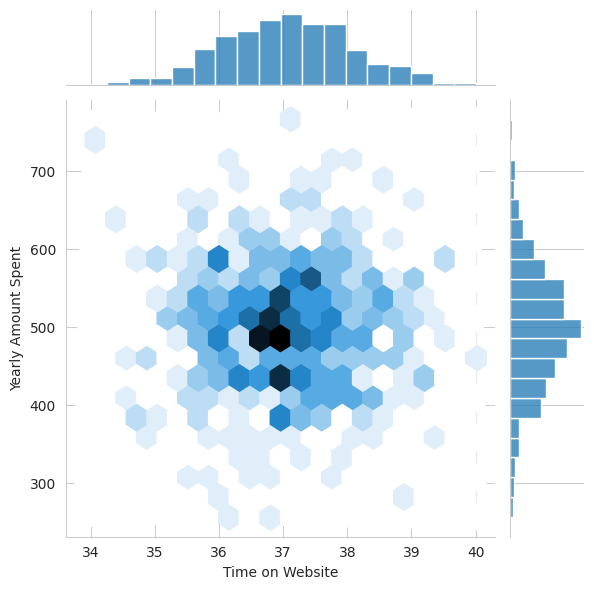

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=cust_data,kind='hex')

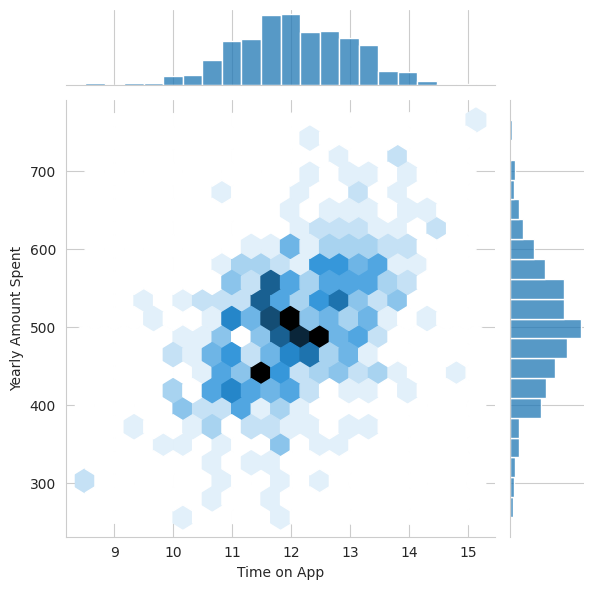

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=cust_data,kind='hex')

By looking at both the graphs above, we see that the time spent on the mobile app is far lesser than time spent on the website for the same amount of money spent. We can double check this relationship by plotting a heatmap of the correlations of data columns.

<Axes: >

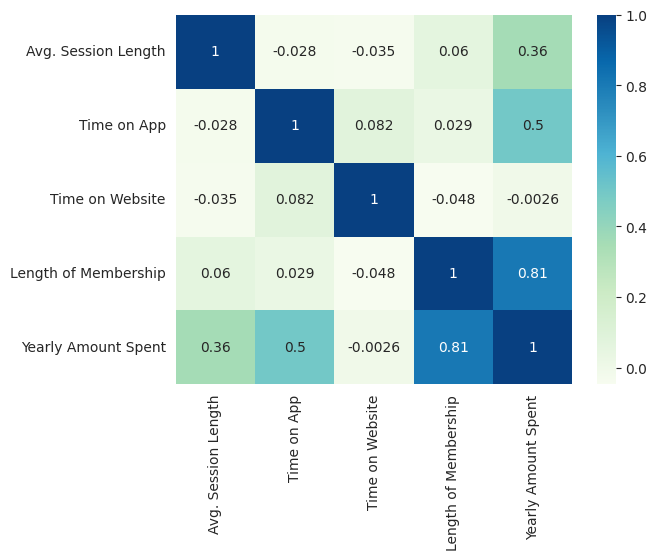

In [14]:
sns.heatmap(cust_data.corr(numeric_only=True),cmap = 'GnBu', annot=True)

Between the App and the website, the correlation with the yearly amount spent is much higher in the case of App at 0.5 as compared to the website which is -0.0026. Another finding is the Length of membership has the highest correlation at 0.81.

(0.0, 7.922689335035807)

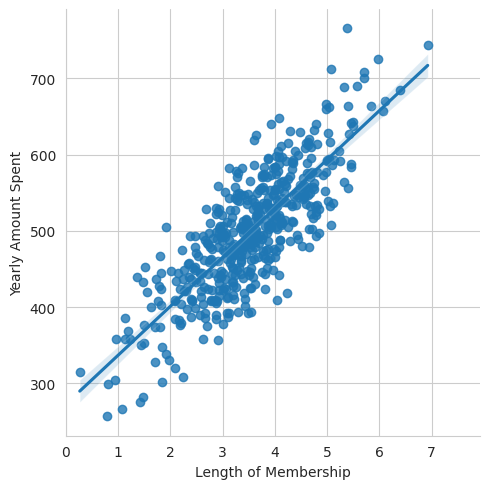

In [15]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=cust_data)
plt.xlim(0,cust_data['Length of Membership'].max()+1)

In [16]:
cust_data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**Splitting the data**

We split the dataset into train and test data.

In [17]:
X = cust_data[[ 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = cust_data['Yearly Amount Spent']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

**Training the model**

In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

**Model predictions**

Let's test the model against the true y values

In [21]:
predictions = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted Y values')

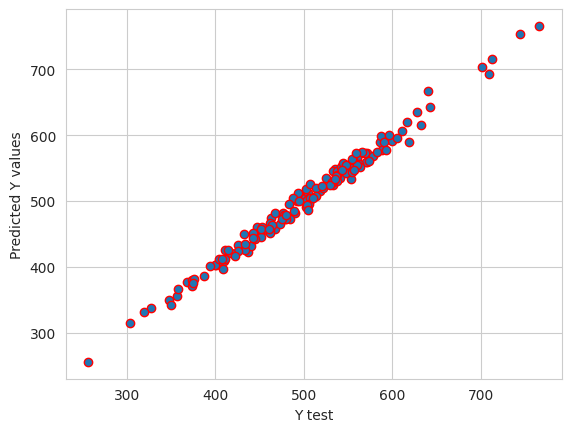

In [22]:
plt.scatter(y_test,predictions,edgecolors='r')
plt.xlabel('Y test')
plt.ylabel('Predicted Y values')

**Conclusion

Let's evaluate the co-efficients

In [23]:
cust_coef_df = pd.DataFrame(linear_model.coef_,index=X.columns,columns=['Coefficient'])

In [24]:
cust_coef_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

* Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of **25.98** total dollars spent.
* Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of **38.59** total dollars spent.
* Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of **0.19** total dollars spent.
* Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of **61.27** total dollars spent.

> Answer : By the data we see that each minute spent on the App would result in more dollars spent by the customer, the company has a choice, it can either focus entirely on the app or improve the website as it is performing poorly. In addition to the above, the company can also introduce measures to lengthen the existing customers' memberships.